In [1]:
import pandas as pd
import bokeh
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
infra = pd.read_csv("infra.csv", sep=";", na_values="-", index_col=0)

In [3]:
def quicklook(df):
    print("Head:\n", df.head())
    print("Tail:\n", df.tail())

In [4]:
infra.index = pd.to_datetime(infra.index)

In [5]:
infra = infra.resample('M', convention='start').mean()

In [6]:
infra.fillna(0, inplace=True)

In [7]:
infra = np.round(infra, decimals=2)

In [8]:
quicklook(infra)

Head:
             Union-Umfrage  SPD-Umfrage  AfD-Umfrage  FDP-Umfrage  \
Datum                                                              
2000-01-31           39.0         39.0          0.0          5.0   
2000-02-29           31.0         43.0          0.0          8.0   
2000-03-31           31.0         42.0          0.0          9.0   
2000-04-30           34.0         39.0          0.0          7.0   
2000-05-31           36.0         41.0          0.0          7.0   

            Linke-Umfrage  Grüne-Umfrage  
Datum                                     
2000-01-31            6.0            7.0  
2000-02-29            6.0            8.0  
2000-03-31            7.0            7.0  
2000-04-30            7.0            8.0  
2000-05-31            5.0            6.0  
Tail:
             Union-Umfrage  SPD-Umfrage  AfD-Umfrage  FDP-Umfrage  \
Datum                                                              
2018-01-31          33.00         20.0        12.50         9.50   
2018

In [9]:
part1 = pd.read_csv("first_half.csv", sep=";", index_col=0)

In [10]:
quicklook(part1)

Head:
          SPD-trends  CDU-trends  CSU-trends  FDP-trends  Grüne-trends
Monat                                                                
2004-01          25          22           8           9            13
2004-02          30          22           7          10            12
2004-03          33          25           5           9            13
2004-04          25          19           7           8             8
2004-05          29          25           6          12            14
Tail:
          SPD-trends  CDU-trends  CSU-trends  FDP-trends  Grüne-trends
Monat                                                                
2018-02          56          25           7           7             7
2018-03          45          14           7           6             6
2018-04          17          11           5           6             6
2018-05          14           9           5           6             6
2018-06          12           9           2           3             6


In [11]:
part2 = pd.read_csv("second_half.csv", sep=";", index_col=0)

In [12]:
quicklook(part2)

Head:
          SPD-trends  CDU-trends  Linke-trends  AfD-trends
Monat                                                    
2004-01           9           8             1           0
2004-02          11           8             0           0
2004-03          12           9             1           0
2004-04           9           7             0           0
2004-05          11          10             1           0
Tail:
          SPD-trends  CDU-trends  Linke-trends  AfD-trends
Monat                                                    
2018-02          21           9             2          20
2018-03          17           5             2          16
2018-04           7           4             2          14
2018-05           5           3             1          17
2018-06           5           3             2          13


In [13]:
rescaled1 = part1/part1["CDU-trends"].max()*100

In [14]:
rescaled2 = part2/part2["CDU-trends"].max()*100

In [15]:
trends = rescaled1.copy(deep=True)

In [16]:
trends= trends.join(rescaled2[["Linke-trends","AfD-trends"]], how="inner")

In [17]:
trends = np.round(trends, decimals=2)

In [18]:
trends.index = pd.to_datetime(trends.index)

In [19]:
trends = trends.resample('M', convention='start').mean()

In [20]:
quicklook(trends)

Head:
             SPD-trends  CDU-trends  CSU-trends  FDP-trends  Grüne-trends  \
Monat                                                                      
2004-01-31        25.0        22.0         8.0         9.0          13.0   
2004-02-29        30.0        22.0         7.0        10.0          12.0   
2004-03-31        33.0        25.0         5.0         9.0          13.0   
2004-04-30        25.0        19.0         7.0         8.0           8.0   
2004-05-31        29.0        25.0         6.0        12.0          14.0   

            Linke-trends  AfD-trends  
Monat                                 
2004-01-31          2.63         0.0  
2004-02-29          0.00         0.0  
2004-03-31          2.63         0.0  
2004-04-30          0.00         0.0  
2004-05-31          2.63         0.0  
Tail:
             SPD-trends  CDU-trends  CSU-trends  FDP-trends  Grüne-trends  \
Monat                                                                      
2018-02-28        56.0      

In [21]:
comparison = trends.join(infra, how="outer")

In [22]:
quicklook(comparison)

Head:
             SPD-trends  CDU-trends  CSU-trends  FDP-trends  Grüne-trends  \
2000-01-31         NaN         NaN         NaN         NaN           NaN   
2000-02-29         NaN         NaN         NaN         NaN           NaN   
2000-03-31         NaN         NaN         NaN         NaN           NaN   
2000-04-30         NaN         NaN         NaN         NaN           NaN   
2000-05-31         NaN         NaN         NaN         NaN           NaN   

            Linke-trends  AfD-trends  Union-Umfrage  SPD-Umfrage  AfD-Umfrage  \
2000-01-31           NaN         NaN           39.0         39.0          0.0   
2000-02-29           NaN         NaN           31.0         43.0          0.0   
2000-03-31           NaN         NaN           31.0         42.0          0.0   
2000-04-30           NaN         NaN           34.0         39.0          0.0   
2000-05-31           NaN         NaN           36.0         41.0          0.0   

            FDP-Umfrage  Linke-Umfrage  Grüne-Umf

In [23]:
comparison.dropna(inplace=True)

In [24]:
comp_SPD = comparison[["SPD-Umfrage", "SPD-trends"]]
comp_Grüne = comparison[["Grüne-Umfrage", "Grüne-trends"]]
comp_FDP = comparison[["FDP-Umfrage", "FDP-trends"]]
comp_Linke = comparison[["Linke-Umfrage", "Linke-trends"]]
comp_AfD = comparison[["AfD-Umfrage", "AfD-trends"]]
comp_CDU = comparison[["Union-Umfrage", "CDU-trends"]]

comp_list = [comp_SPD, comp_Grüne, comp_FDP, comp_Linke, comp_AfD, comp_CDU]

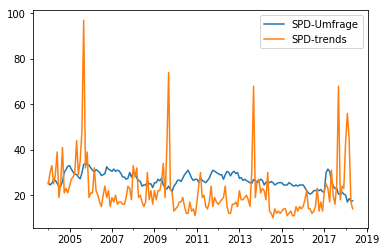

Korrelation: 0.01


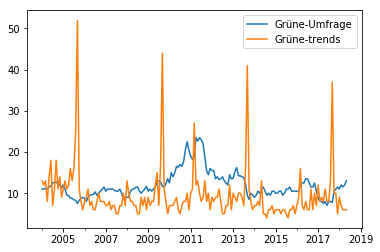

Korrelation: -0.07


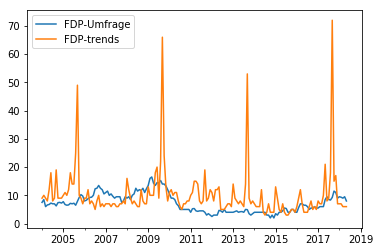

Korrelation: 0.2


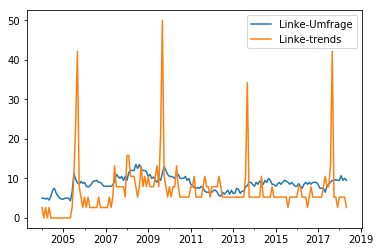

Korrelation: 0.33


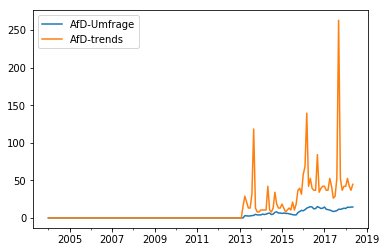

Korrelation: 0.69


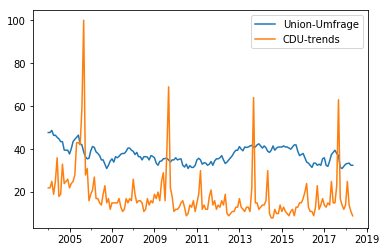

Korrelation: 0.22


In [31]:
for party in comp_list:
    party.plot()
    corrs = pd.DataFrame.corr(party)
    i0 = corrs.index[0]
    i1 = corrs.index[1]
    plt.show()
    print("Korrelation:", np.round(corrs[i0][i1],2))
    print("====="*20)